# Lab 03: Linear Regression and How to minimize cost 를 TensorFlow 로 구현하기

## 핵심키워드
- 선형회귀(Linear Regression)
- 가설(Hypothesis)
- 비용함수(Cost function)
- 경사 하강법(Gradient Descent)
- 볼록 함수(Convex function)

In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(f'>>> original : tf - 2.4.0  |  np - 1.19.4')
print(f'>>> present  : tf - {tf.__version__}  |  np - {np.__version__}')

>>> original : tf - 2.4.0  |  np - 1.19.4
>>> present  : tf - 2.4.0  |  np - 1.19.4


## Cost function in pure Python

In [8]:
X = np.array([1, 2, 3])
Y = np.array([1, 2, 3])

def cost_func(W, X, Y):
  cost = 0
  for i in range(len(X)):
    cost += (W * X[i] - Y[i])**2  # simplified hypothesis
  return cost/len(X)

for feed_W in np.linspace(-3, 5, num=15):
  tmp_cost = cost_func(feed_W, X, Y)
  print(f'{feed_W:6.3f} | {tmp_cost:10.5f}')

-3.000 |   74.66667
-2.429 |   54.85714
-1.857 |   38.09524
-1.286 |   24.38095
-0.714 |   13.71429
-0.143 |    6.09524
 0.429 |    1.52381
 1.000 |    0.00000
 1.571 |    1.52381
 2.143 |    6.09524
 2.714 |   13.71429
 3.286 |   24.38095
 3.857 |   38.09524
 4.429 |   54.85714
 5.000 |   74.66667


## Cost function in TensorFlow

In [9]:
X = np.array([1, 2, 3])
Y = np.array([1, 2, 3])

def cost_func(W, X, Y):
  cost = tf.reduce_mean(tf.square(tf.multiply(W, X) - Y))
  return cost/len(X)

W_values = np.linspace(-3, 5, num=15)
cost_values = []

for feed_W in W_values:
  tmp_cost = cost_func(feed_W, X, Y)
  cost_values.append(tmp_cost)
  print(f'{feed_W:6.3f} | {tmp_cost:10.5f}')

-3.000 |   24.88889
-2.429 |   18.28571
-1.857 |   12.69841
-1.286 |    8.12698
-0.714 |    4.57143
-0.143 |    2.03175
 0.429 |    0.50794
 1.000 |    0.00000
 1.571 |    0.50794
 2.143 |    2.03175
 2.714 |    4.57143
 3.286 |    8.12698
 3.857 |   12.69841
 4.429 |   18.28571
 5.000 |   24.88889


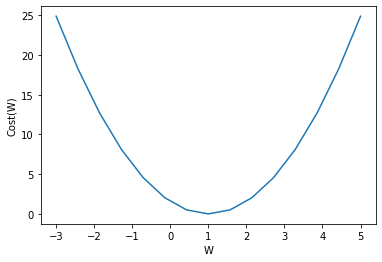

In [10]:
plt.figure(figsize=(6, 4))
plt.plot(W_values, cost_values)
plt.xlabel('W')
plt.ylabel('Cost(W)')
plt.show()

## Gredient Descent

In [11]:
tf.random.set_seed(0)

x_data = [1, 2, 3, 4]
y_data = [1, 3, 5, 7]

W = tf.Variable(tf.random.normal([1], -100, 100))
alpha = 0.01

for step in range(301):
  hypothesis = tf.multiply(W, x_data)
  cost = tf.reduce_mean(tf.square(hypothesis-y_data))

  gradient = tf.reduce_mean(tf.multiply(hypothesis-y_data, x_data))
  descent = W - tf.multiply(alpha, gradient)
  W.assign(descent)
  
  if step%10==0:
    print(f'{step:5} | {cost.numpy():10.4f} | {W.numpy()[0]:10.6f}')

    0 | 18332.2188 |  47.398293
   10 |  3855.3564 |  22.638384
   20 |   810.9046 |  11.283927
   30 |   170.6631 |   6.076973
   40 |    36.0217 |   3.689155
   50 |     7.7069 |   2.594144
   60 |     1.7524 |   2.091991
   70 |     0.5001 |   1.861713
   80 |     0.2368 |   1.756112
   90 |     0.1814 |   1.707684
  100 |     0.1698 |   1.685477
  110 |     0.1673 |   1.675292
  120 |     0.1668 |   1.670622
  130 |     0.1667 |   1.668481
  140 |     0.1667 |   1.667498
  150 |     0.1667 |   1.667048
  160 |     0.1667 |   1.666842
  170 |     0.1667 |   1.666747
  180 |     0.1667 |   1.666703
  190 |     0.1667 |   1.666684
  200 |     0.1667 |   1.666674
  210 |     0.1667 |   1.666670
  220 |     0.1667 |   1.666668
  230 |     0.1667 |   1.666667
  240 |     0.1667 |   1.666667
  250 |     0.1667 |   1.666667
  260 |     0.1667 |   1.666667
  270 |     0.1667 |   1.666667
  280 |     0.1667 |   1.666667
  290 |     0.1667 |   1.666667
  300 |     0.1667 |   1.666667


In [12]:
# predict Y
print(5.0 * W)
print(2.5 * W)

tf.Tensor([8.333338], shape=(1,), dtype=float32)
tf.Tensor([4.166669], shape=(1,), dtype=float32)


## Linear Regression Summary

---

**1. Hypothesis**
$$ H(x) = Wx + b $$

---

**2. Cost**
$$ cost(W)=\frac { 1 }{ m } \sum _{i=1}^{m}{ { (W{ x }^{ i }-y^{ i } })^{ 2 } }  $$

---

**3. Gradient Descent**
$$ W := W-\alpha \frac { \partial  }{ \partial W } cost(W) $$